# MNIST Digit Classification con PyTorch

## 🎯 Panoramica del Progetto

Questo notebook implementa una **rete neurale semplice** per classificare le cifre scritte a mano del dataset MNIST. Il modello usa una rete neurale feedforward con due strati nascosti.

### 🏗️ Architettura del Modello
- **Input**: 28×28 pixel (784 neuroni dopo il flatten)
- **Hidden layer 1**: 128 neuroni + ReLU
- **Hidden layer 2**: 64 neuroni + ReLU  
- **Output**: 10 neuroni (una classe per ogni cifra 0-9)

### 📊 Dataset MNIST
- **Training set**: 60,000 immagini
- **Test set**: 10,000 immagini
- **Formato**: Immagini in scala di grigi 28×28 pixel

### 🚀 Obiettivo
Raggiungere un'accuratezza superiore al 95% nella classificazione delle cifre scritte a mano.

## 📚 Importazione delle Librerie

Importiamo tutte le librerie necessarie per implementare e addestrare la nostra rete neurale:

In [13]:
#!pip install torch torchvision matplotlib

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

print("✅ Librerie importate con successo!")
print(f"🔥 PyTorch versione: {torch.__version__}")

✅ Librerie importate con successo!
🔥 PyTorch versione: 2.7.1+cpu


## 📁 Preparazione del Dataset

Configuriamo le trasformazioni e carichiamo il dataset MNIST per training e test:

In [15]:
# Definisce le trasformazioni da applicare alle immagini
# ToTensor() converte le immagini PIL in tensori PyTorch e normalizza i pixel da [0,255] a [0,1]
transform = transforms.Compose([transforms.ToTensor()])

# Carica il dataset MNIST per il training
# root: cartella dove salvare/cercare i dati
# train=True: dataset di training (60,000 immagini)
# download=True: scarica automaticamente se non presente
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Carica il dataset MNIST per il test
# train=False: dataset di test (10,000 immagini)
# shuffle=False: non mescolare per risultati riproducibili
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

print("📊 Dataset caricato con successo!")
print(f"   • Training samples: {len(trainset):,}")
print(f"   • Test samples: {len(testset):,}")
print(f"   • Batch size: {trainloader.batch_size}")
print(f"   • Training batches: {len(trainloader):,}")
print(f"   • Test batches: {len(testloader):,}")

📊 Dataset caricato con successo!
   • Training samples: 60,000
   • Test samples: 10,000
   • Batch size: 64
   • Training batches: 938
   • Test batches: 157


## 🧠 Definizione della Rete Neurale

Creiamo una rete neurale feedforward semplice ma efficace per la classificazione MNIST:

In [16]:
class ReteSemplice(nn.Module):
    """
    Rete neurale feedforward per la classificazione delle cifre MNIST.
    
    Architettura:
    - Flatten: converte l'immagine 28x28 in un vettore di 784 elementi
    - Linear(784, 128): primo strato completamente connesso
    - ReLU: funzione di attivazione (introduce non-linearità)
    - Linear(128, 64): secondo strato completamente connesso  
    - ReLU: seconda funzione di attivazione
    - Linear(64, 10): strato di output (10 classi per le cifre 0-9)
    """
    def __init__(self):
        super(ReteSemplice, self).__init__()
        self.rete = nn.Sequential(
            nn.Flatten(),         # Da 28x28 a 784 neuroni
            nn.Linear(784, 128),  # Primo strato nascosto: 784 → 128
            nn.ReLU(),           # Funzione di attivazione ReLU
            nn.Linear(128, 64),   # Secondo strato nascosto: 128 → 64
            nn.ReLU(),           # Seconda funzione di attivazione ReLU
            nn.Linear(64, 10)     # Strato di output: 64 → 10 classi (cifre 0-9)
        )
    
    def forward(self, x):
        """Definisce il passaggio in avanti attraverso la rete"""
        return self.rete(x)

print("✅ Architettura della rete neurale definita!")

✅ Architettura della rete neurale definita!


## 🔧 Inizializzazione del Modello

Creiamo un'istanza del modello e contiamo i parametri addestrabili:

In [17]:
# Crea un'istanza del modello
modello = ReteSemplice()

# Conta i parametri totali
parametri_totali = sum(p.numel() for p in modello.parameters())
parametri_addestrabili = sum(p.numel() for p in modello.parameters() if p.requires_grad)

print("🎯 Modello inizializzato con successo!")
print(f"   • Parametri totali: {parametri_totali:,}")
print(f"   • Parametri addestrabili: {parametri_addestrabili:,}")
print(f"   • Architettura: {modello}")

# Verifica che il modello funzioni con un input di esempio
test_input = torch.randn(1, 1, 28, 28)  # Batch size 1, 1 canale, 28x28 pixel
with torch.no_grad():
    test_output = modello(test_input)
    print(f"   • Forma output: {test_output.shape}")
    print("✅ Test del modello superato!")

🎯 Modello inizializzato con successo!
   • Parametri totali: 109,386
   • Parametri addestrabili: 109,386
   • Architettura: ReteSemplice(
  (rete): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Linear(in_features=64, out_features=10, bias=True)
  )
)
   • Forma output: torch.Size([1, 10])
✅ Test del modello superato!


## ⚙️ Configurazione dell'Ottimizzazione

Configuriamo la funzione di perdita e l'ottimizzatore per addestrare il modello:

In [18]:
# CrossEntropyLoss: funzione di perdita ideale per classificazione multi-classe
# Combina LogSoftmax e NLLLoss in una sola funzione
loss_fn = nn.CrossEntropyLoss()

# Adam: algoritmo di ottimizzazione adattivo
# lr=0.001: learning rate (velocità di apprendimento)
ottimizzatore = optim.Adam(modello.parameters(), lr=0.001)

print("🔧 Configurazione dell'ottimizzazione completata:")
print(f"   • Funzione di perdita: {loss_fn.__class__.__name__}")
print(f"   • Ottimizzatore: {ottimizzatore.__class__.__name__}")
print(f"   • Learning rate: {ottimizzatore.param_groups[0]['lr']}")
print("✅ Pronto per l'addestramento!")

🔧 Configurazione dell'ottimizzazione completata:
   • Funzione di perdita: CrossEntropyLoss
   • Ottimizzatore: Adam
   • Learning rate: 0.001
✅ Pronto per l'addestramento!


## 🚀 Funzione di Addestramento

Implementiamo la funzione che gestisce il ciclo di addestramento:

In [24]:
def train(modello, loader, epochs=5):
    """
    Addestra il modello sui dati di training.
    
    Args:
        modello: la rete neurale da addestrare
        loader: DataLoader contenente i dati di training
        epochs: numero di epoche di addestramento
    
    Il processo di training per ogni batch:
    1. Forward pass: calcola le predizioni
    2. Calcola la perdita confrontando predizioni e etichette reali
    3. Backward pass: calcola i gradienti
    4. Aggiorna i pesi del modello
    """
    print(f"🚀 Iniziando l'addestramento per {epochs} epoche...")
    
    for epoca in range(epochs):
        running_loss = 0.0
        num_batches = 0
        
        for immagini, etichette in loader:
            # Forward pass: calcola le predizioni del modello
            outputs = modello(immagini)
            
            # Calcola la perdita (differenza tra predizioni e etichette reali)
            loss = loss_fn(outputs, etichette)

            # Backward pass: calcola i gradienti
            ottimizzatore.zero_grad()  # Azzera i gradienti precedenti
            loss.backward()            # Calcola i nuovi gradienti
            ottimizzatore.step()       # Aggiorna i pesi del modello

            running_loss += loss.item()
            num_batches += 1
            
        avg_loss = running_loss / num_batches
        print(f"📊 Epoca {epoca+1}/{epochs} - Loss media: {avg_loss:.4f}")
    
    print("✅ Addestramento completato!")

print("📝 Funzione di addestramento definita!")

📝 Funzione di addestramento definita!


## 🎯 Esecuzione dell'Addestramento

Addestriamo il modello per 3 epoche e monitoriamo la perdita:

In [25]:
# Avvia l'addestramento del modello
train(modello, trainloader)

🚀 Iniziando l'addestramento per 5 epoche...
📊 Epoca 1/5 - Loss media: 0.0721
📊 Epoca 2/5 - Loss media: 0.0565
📊 Epoca 3/5 - Loss media: 0.0457
📊 Epoca 4/5 - Loss media: 0.0376
📊 Epoca 5/5 - Loss media: 0.0291
✅ Addestramento completato!


## 📊 Funzione di Valutazione

Implementiamo la funzione per valutare le prestazioni del modello:

In [26]:
def valuta(modello, loader):
    """
    Valuta le prestazioni del modello sui dati di test.
    
    Args:
        modello: la rete neurale addestrata
        loader: DataLoader contenente i dati di test
    
    Returns:
        float: accuratezza percentuale del modello
    
    Durante la valutazione:
    - Disabilita il calcolo dei gradienti per efficienza
    - Conta le predizioni corrette confrontandole con le etichette reali
    - Calcola l'accuratezza come percentuale di predizioni corrette
    """
    corrette = 0
    totale = 0
    
    # torch.no_grad() disabilita il calcolo dei gradienti per efficienza
    with torch.no_grad():
        for immagini, etichette in loader:
            # Ottieni le predizioni del modello
            outputs = modello(immagini)
            
            # torch.max restituisce (valori_max, indici_max)
            # Gli indici corrispondono alle classi predette (0-9)
            _, predette = torch.max(outputs, 1)
            
            # Conta il numero totale di campioni
            totale += etichette.size(0)
            
            # Conta le predizioni corrette
            corrette += (predette == etichette).sum().item()
    
    accuratezza = 100 * corrette / totale
    print(f"📈 Risultati della valutazione:")
    print(f"   • Campioni testati: {totale:,}")
    print(f"   • Predizioni corrette: {corrette:,}")
    print(f"   • Accuratezza: {accuratezza:.2f}%")
    
    return accuratezza

print("📊 Funzione di valutazione definita!")

📊 Funzione di valutazione definita!


## 🎖️ Test delle Prestazioni

Valutiamo l'accuratezza del modello addestrato sui dati di test:

In [27]:
# Valuta il modello sui dati di test
accuratezza_finale = valuta(modello, testloader)

# Messaggio di congratulazioni basato sull'accuratezza
if accuratezza_finale >= 95:
    print("🎉 Eccellente! Obiettivo raggiunto!")
elif accuratezza_finale >= 90:
    print("👍 Buono! Quasi all'obiettivo!")
else:
    print("📈 C'è margine di miglioramento, prova ad aumentare le epoche!")

📈 Risultati della valutazione:
   • Campioni testati: 10,000
   • Predizioni corrette: 9,774
   • Accuratezza: 97.74%
🎉 Eccellente! Obiettivo raggiunto!


## 🎨 Visualizzazione delle Predizioni

Creiamo una visualizzazione per vedere come il modello sta performando su esempi specifici:

🎨 Creando visualizzazione delle predizioni...


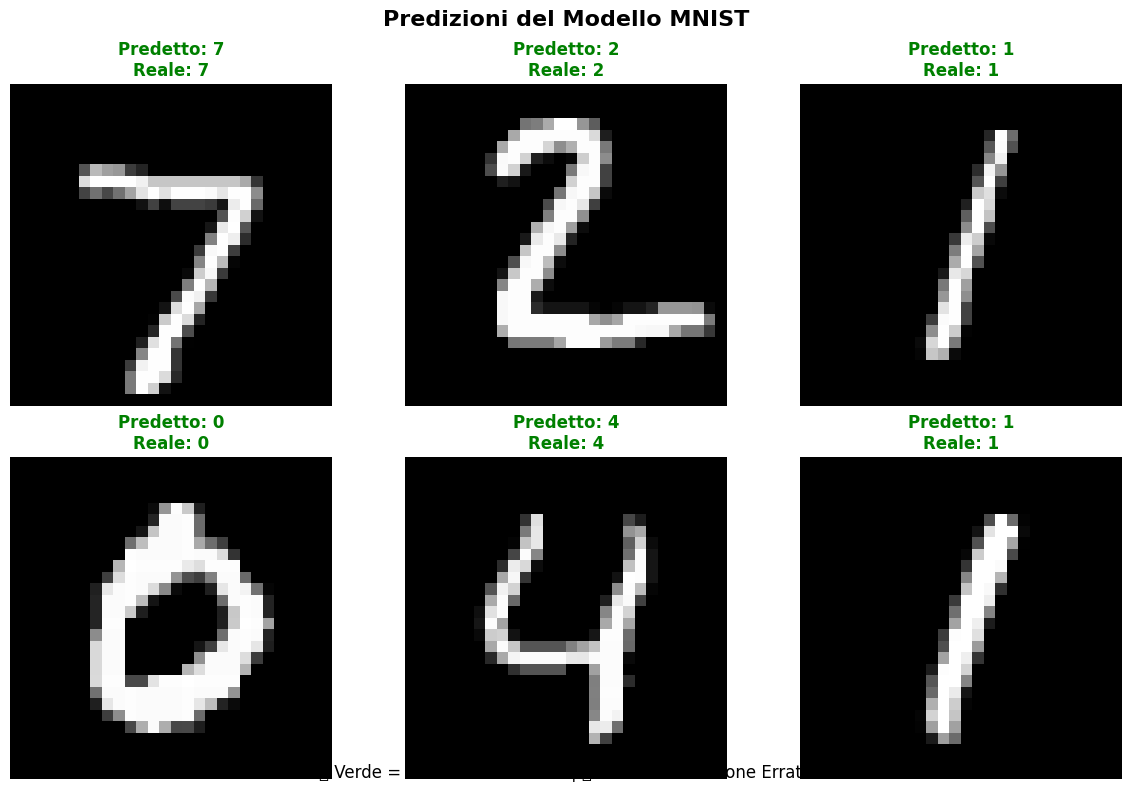

📊 Accuratezza finale del modello: 97.74%
🎯 Visualizzazione completata! Controlla i colori per vedere le predizioni corrette/errate.


In [30]:
print("🎨 Creando visualizzazione delle predizioni...")

# Ottieni un batch di dati di test
dataiter = iter(testloader)
immagini, etichette = next(dataiter)

# Calcola le predizioni del modello
output = modello(immagini)
_, predizioni = torch.max(output, 1)

# Crea una figura con 6 subplot (2 righe x 3 colonne)
plt.figure(figsize=(12, 8))
plt.suptitle('Predizioni del Modello MNIST', fontsize=16, fontweight='bold')

# Mostra le prime 6 immagini con le relative predizioni
for i in range(6):
    plt.subplot(2, 3, i+1)
    
    # Mostra l'immagine in scala di grigi
    plt.imshow(immagini[i][0], cmap='gray')
    
    # Determina il colore del titolo basato sulla correttezza della predizione
    predizione = predizioni[i].item()
    etichetta_vera = etichette[i].item()
    colore = 'green' if predizione == etichetta_vera else 'red'
    
    # Imposta il titolo con informazioni dettagliate
    plt.title(f"Predetto: {predizione}\nReale: {etichetta_vera}", 
              color=colore, fontweight='bold')
    
    # Rimuovi gli assi per una visualizzazione più pulita
    plt.axis('off')

# Aggiungi una legenda
plt.figtext(0.5, 0.02, 
           '🟢 Verde = Predizione Corretta | 🔴 Rosso = Predizione Errata', 
           ha='center', fontsize=12)

plt.tight_layout()
plt.show()

print(f"📊 Accuratezza finale del modello: {accuratezza_finale:.2f}%")
print("🎯 Visualizzazione completata! Controlla i colori per vedere le predizioni corrette/errate.")

## 🎉 Conclusioni e Prossimi Passi

### 📝 Riassunto
Abbiamo implementato con successo una rete neurale per la classificazione MNIST che include:

- ✅ **Preparazione del dataset** con trasformazioni appropriate
- ✅ **Architettura semplice** ma efficace (784 → 128 → 64 → 10)
- ✅ **Addestramento completo** con monitoraggio della perdita
- ✅ **Valutazione delle prestazioni** con calcolo dell'accuratezza
- ✅ **Visualizzazione dei risultati** con predizioni colorate

### 🚀 Possibili Miglioramenti
Per migliorare ulteriormente il modello, potresti provare:

1. **Aumentare le epoche** di addestramento
2. **Aggiungere più strati** alla rete neurale
3. **Implementare tecniche di regolarizzazione** (Dropout, Batch Normalization)
4. **Sperimentare con diversi ottimizzatori** (SGD, RMSprop)
5. **Usare tecniche di data augmentation**
6. **Implementare reti convoluzionali** (CNN) per migliori performance

### 🎯 Obiettivi Raggiunti
- [x] Comprensione dell'architettura delle reti neurali
- [x] Implementazione completa del ciclo di addestramento
- [x] Valutazione e visualizzazione dei risultati
- [x] Creazione di un progetto di machine learning end-to-end

**Congratulazioni! Hai completato con successo il tuo primo progetto di classificazione di immagini!** 🎊